In [1]:
import pandas as pd
import seaborn as sb

In [6]:
df = pd.read_csv("groups.csv", sep="|")
df

,group_id,planned_time,real_time,delay,delay in %,path
0,1,2,63,61,3050,München Hbf.7746.Arrival->.14.Walk->München Hb...
1,2,86,146,60,69,Duisburg Hbf.7733.Arrival->137653.69.Trip->Mün...
2,3,40,90,50,125,Donauwörth.7755.Arrival->137265.54.Trip->Münch...
3,4,169,162,-7,-4,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
4,5,272,297,25,9,München Hbf.7746.Arrival->.14.Walk->München Hb...
...,...,...,...,...,...,...
1047,1050,169,162,-7,-4,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
1048,1051,221,281,60,27,Davos Monstein.7903.Departure->40859.13.Trip->...
1049,1052,221,281,60,27,Davos Monstein.7903.Departure->40859.13.Trip->...
1050,1053,169,162,-7,-4,München ZOB (Hackerbrücke).7861.Arrival->.12.W...


# Calculate different delay metrics

In [7]:
delay = df["delay"].sum()
delay_perc = df["delay in %"].sum()
print("Total delay:", delay, "min", "=", delay/60, "h")
print("Average delay:", delay/len(df), "min", "=", delay/len(df)/60, "h")
print("Average % delay:", delay_perc/len(df), "%")

Total delay: 23911 min = 398.51666666666665 h
Average delay: 22.729087452471482 min = 0.37881812420785804 h
Average % delay: 38.74429657794677 %


# Calculate different edge metrics

In [8]:
df = pd.read_csv("edges.csv", sep="|")
df

,edge_index,duration,capacity,utilization
0,EdgeIndex(2598659),2,261,1
1,EdgeIndex(326603),3,166,7
2,EdgeIndex(949299),4,254,5
3,EdgeIndex(2581343),1,286,3
4,EdgeIndex(2537059),3,141,12
...,...,...,...,...
3433,EdgeIndex(875297),2,180,18
3434,EdgeIndex(607393),22,212,5
3435,EdgeIndex(2537045),2,141,12
3436,EdgeIndex(905803),11,173,21


In [13]:
print("Number of strained trip edges:", len(df))
df_filtered = df[df['capacity'] < df['utilization']].loc[:]
print("Number of strained trip edges with utilization > capacity:", len(df_filtered))
df_filtered["overload"] = df_filtered["utilization"]-df_filtered["capacity"]
total_overload = df_filtered["overload"].sum()
print("Total overload (only edges with utilization > capacity):", total_overload)
print("Average overload (only edges with utilization > capacity):", total_overload/len(df_filtered))
print("Max overload of one edge:", df_filtered["overload"].max())
df_filtered

Number of strained trip edges: 3438
Number of strained trip edges with utilization > capacity: 168
Total overload (only edges with utilization > capacity): 1454
Average overload (only edges with utilization > capacity): 8.654761904761905
Max overload of one edge: 42


,edge_index,duration,capacity,utilization,overload
21,EdgeIndex(3487727),10,0,2,2
32,EdgeIndex(1749539),8,27,55,28
38,EdgeIndex(3487725),3,0,2,2
43,EdgeIndex(103433),8,0,5,5
74,EdgeIndex(2157237),7,0,2,2
...,...,...,...,...,...
3366,EdgeIndex(1732977),28,0,10,10
3375,EdgeIndex(104803),3,0,24,24
3407,EdgeIndex(1758137),19,45,52,7
3418,EdgeIndex(3360827),2,0,2,2


<AxesSubplot:xlabel='overload', ylabel='Count'>

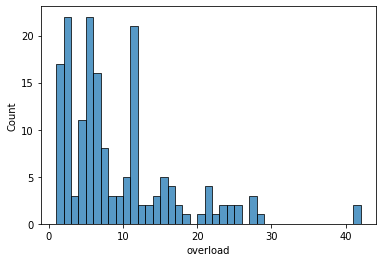

In [12]:
sb.histplot(df_filtered, x="overload", bins=range(1, df_filtered["overload"].max()+1))